In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
df=pd.read_csv('irhp.csv')

In [161]:
df.head()


,ID,property_scope,availability,location,size,total_sqft,bath,balcony,buying or not buying,BER,Renovation needed,price-per-sqft-$
0,0,Extended Coverage,17-Oct,Fingal,2 BED,1056,2.0,1.0,No,A,No,419.928030
1,1,Land Parcel,Ready To Move,South Dublin,4 Bedroom,2600,5.0,3.0,No,D,Yes,523.846154
2,2,Constructed Space,Ready To Move,Dun Laoghaire,3 BED,1440,2.0,3.0,No,G,Yes,488.680556
3,3,Extended Coverage,Ready To Move,South Dublin,3 BED,1521,3.0,1.0,No,G,Yes,708.908613
4,4,Extended Coverage,Ready To Move,DCC,2 BED,1200,2.0,1.0,No,F,Yes,482.375000


In [162]:
df['price-per-sqft-$'].isnull().sum()

246

In [163]:
df.tail()
df.describe()

,ID,bath,balcony,price-per-sqft-$
count,13320.000000,13247.000000,12711.000000,1.307400e+04
mean,6659.500000,2.692610,1.584376,1.427913e+03
std,3845.297128,1.341458,0.817263,4.611435e+04
min,0.000000,1.000000,0.000000,3.039868e+01
25%,3329.750000,2.000000,1.000000,4.841873e+02
50%,6659.500000,2.000000,2.000000,6.190909e+02
75%,9989.250000,3.000000,2.000000,8.338172e+02
max,13319.000000,40.000000,3.000000,4.953333e+06


In [164]:
df.shape

(13320, 12)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    13320 non-null  int64  
 1   property_scope        13320 non-null  object 
 2   availability          13320 non-null  object 
 3   location              13319 non-null  object 
 4   size                  13304 non-null  object 
 5   total_sqft            13320 non-null  object 
 6   bath                  13247 non-null  float64
 7   balcony               12711 non-null  float64
 8   buying or not buying  13320 non-null  object 
 9   BER                   13320 non-null  object 
 10  Renovation needed     13320 non-null  object 
 11  price-per-sqft-$      13074 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.2+ MB


In [166]:
df.isnull().sum()

ID                        0
property_scope            0
availability              0
location                  1
size                     16
total_sqft                0
bath                     73
balcony                 609
buying or not buying      0
BER                       0
Renovation needed         0
price-per-sqft-$        246
dtype: int64

In [167]:
df.duplicated().sum()

0

In [168]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("****"*10)

property_scope
Extended Coverage    8790
Constructed Space    2418
Land Parcel          2025
Usable Interior        87
Name: count, dtype: int64
****************************************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
15-Dec               1
15-Jun               1
14-Nov               1
14-Jul               1
Name: count, Length: 81, dtype: int64
****************************************
location
Fingal           4875
DCC              3030
South Dublin     2610
Dun Laoghaire    2324
Other             480
Name: count, dtype: int64
****************************************
size
2 BED         5199
3 BED         4310
4 Bedroom      826
4 BED          591
1 BED          551
3 Bedroom      547
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BED           59
9 Bedroom       46
6 BED       

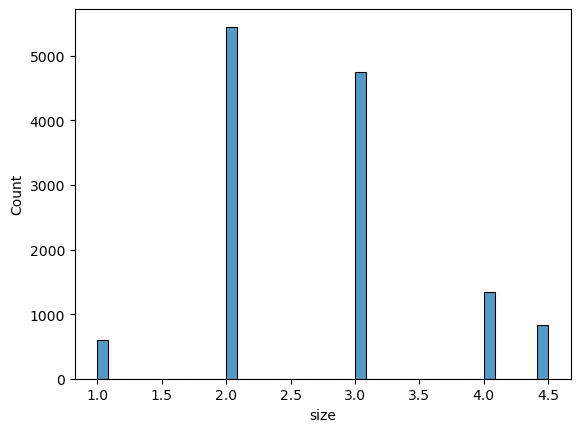

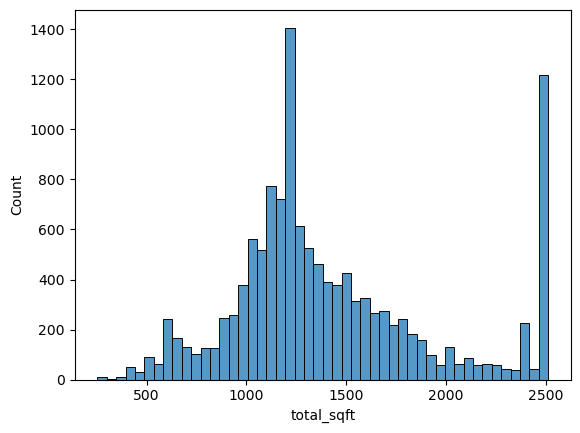

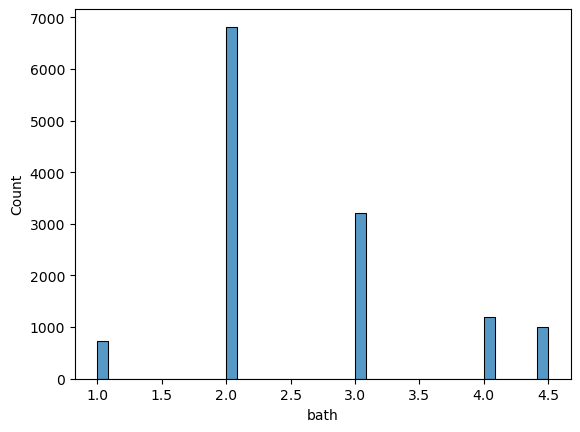

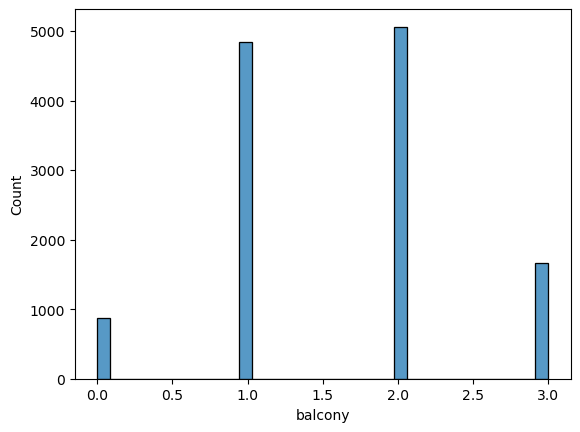

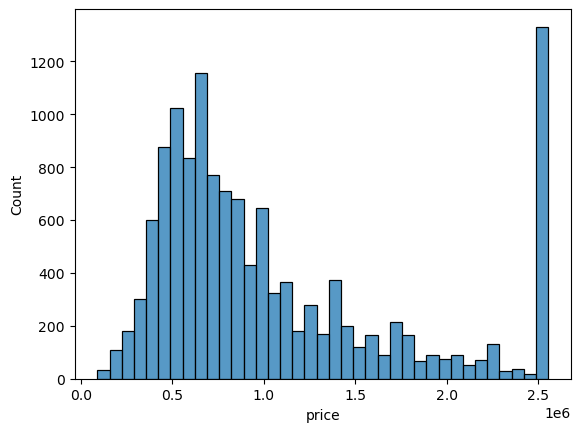

In [196]:
for i in df.select_dtypes(include="float").columns:
    sns.histplot(x=i,data=df)
    plt.show()

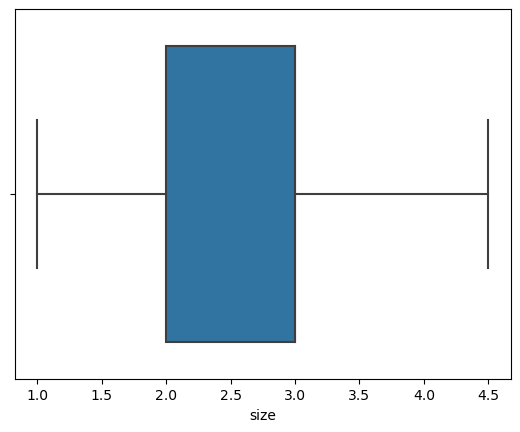

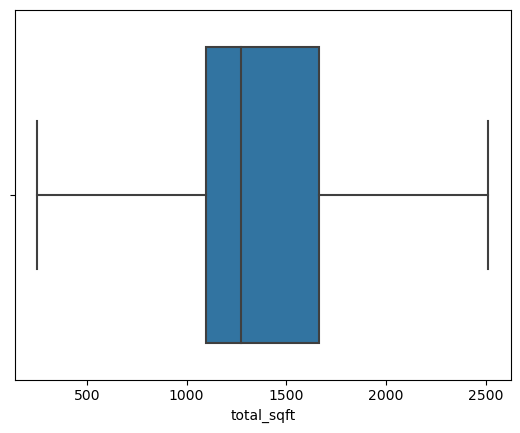

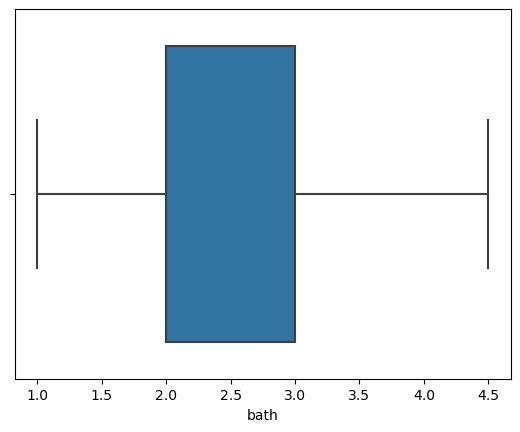

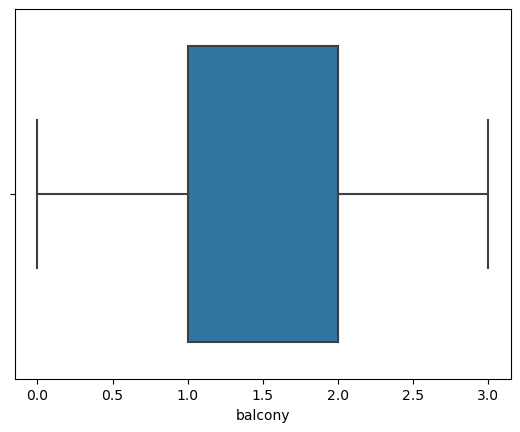

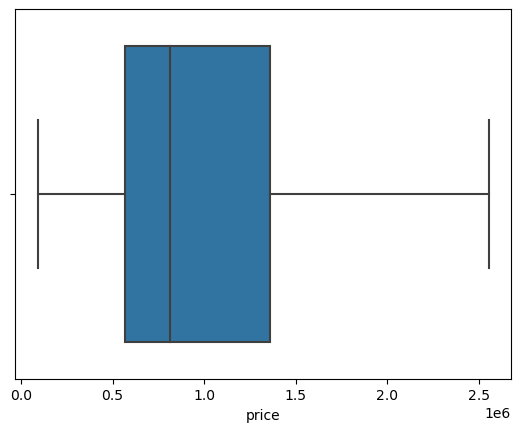

In [195]:
for i in df.select_dtypes(include="float").columns:
    sns.boxplot(x=i,data=df)
    plt.show()

<Axes: >

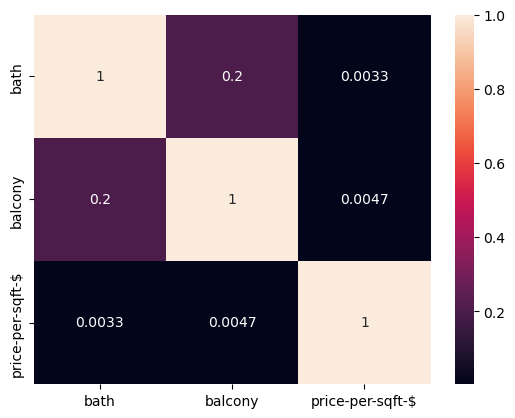

In [254]:
# plt.figure(figsize=(50,50))
s=df.select_dtypes(include="float").corr()
sns.heatmap(s,annot=True)

In [169]:
df=df.drop(columns=['ID','availability','buying or not buying'],axis=1)

In [170]:
df

,property_scope,location,size,total_sqft,bath,balcony,BER,Renovation needed,price-per-sqft-$
0,Extended Coverage,Fingal,2 BED,1056,2.0,1.0,A,No,419.928030
1,Land Parcel,South Dublin,4 Bedroom,2600,5.0,3.0,D,Yes,523.846154
2,Constructed Space,Dun Laoghaire,3 BED,1440,2.0,3.0,G,Yes,488.680556
3,Extended Coverage,South Dublin,3 BED,1521,3.0,1.0,G,Yes,708.908613
4,Extended Coverage,DCC,2 BED,1200,2.0,1.0,F,Yes,482.375000
...,...,...,...,...,...,...,...,...,...
13315,Constructed Space,Dun Laoghaire,5 Bedroom,3453,4.0,0.0,B,Maybe,759.296264
13316,Extended Coverage,Fingal,4 BED,3600,5.0,NaN,A,No,1261.111111
13317,Constructed Space,Fingal,2 BED,1141,2.0,1.0,A,No,596.844873
13318,Extended Coverage,South Dublin,4 BED,4689,4.0,1.0,C,Maybe,1181.232672


In [171]:
df['size'] = df['size'].str.extract('(\d+)') 
df['size'] = pd.to_numeric(df['size'], errors='coerce', downcast='integer')

In [172]:
df

,property_scope,location,size,total_sqft,bath,balcony,BER,Renovation needed,price-per-sqft-$
0,Extended Coverage,Fingal,2.0,1056,2.0,1.0,A,No,419.928030
1,Land Parcel,South Dublin,4.0,2600,5.0,3.0,D,Yes,523.846154
2,Constructed Space,Dun Laoghaire,3.0,1440,2.0,3.0,G,Yes,488.680556
3,Extended Coverage,South Dublin,3.0,1521,3.0,1.0,G,Yes,708.908613
4,Extended Coverage,DCC,2.0,1200,2.0,1.0,F,Yes,482.375000
...,...,...,...,...,...,...,...,...,...
13315,Constructed Space,Dun Laoghaire,5.0,3453,4.0,0.0,B,Maybe,759.296264
13316,Extended Coverage,Fingal,4.0,3600,5.0,NaN,A,No,1261.111111
13317,Constructed Space,Fingal,2.0,1141,2.0,1.0,A,No,596.844873
13318,Extended Coverage,South Dublin,4.0,4689,4.0,1.0,C,Maybe,1181.232672


In [173]:
def convert(value):
    try:
        if '-' in value:  
            parts = value.split('-')
            return (int(parts[0]) + int(parts[1])) / 2 
        elif value.isdigit():  
            return int(value)
        else: 
            return np.nan
    except Exception as e:
        return np.nan

df['total_sqft'] = df['total_sqft'].apply(convert)

In [174]:
df

,property_scope,location,size,total_sqft,bath,balcony,BER,Renovation needed,price-per-sqft-$
0,Extended Coverage,Fingal,2.0,1056.0,2.0,1.0,A,No,419.928030
1,Land Parcel,South Dublin,4.0,2600.0,5.0,3.0,D,Yes,523.846154
2,Constructed Space,Dun Laoghaire,3.0,1440.0,2.0,3.0,G,Yes,488.680556
3,Extended Coverage,South Dublin,3.0,1521.0,3.0,1.0,G,Yes,708.908613
4,Extended Coverage,DCC,2.0,1200.0,2.0,1.0,F,Yes,482.375000
...,...,...,...,...,...,...,...,...,...
13315,Constructed Space,Dun Laoghaire,5.0,3453.0,4.0,0.0,B,Maybe,759.296264
13316,Extended Coverage,Fingal,4.0,3600.0,5.0,NaN,A,No,1261.111111
13317,Constructed Space,Fingal,2.0,1141.0,2.0,1.0,A,No,596.844873
13318,Extended Coverage,South Dublin,4.0,4689.0,4.0,1.0,C,Maybe,1181.232672


In [175]:
df = df.dropna(subset=['price-per-sqft-$'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13074 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_scope     13074 non-null  object 
 1   location           13073 non-null  object 
 2   size               13066 non-null  float64
 3   total_sqft         12987 non-null  float64
 4   bath               13057 non-null  float64
 5   balcony            12525 non-null  float64
 6   BER                13074 non-null  object 
 7   Renovation needed  13074 non-null  object 
 8   price-per-sqft-$   13074 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1021.4+ KB


In [176]:
df['price']=df['total_sqft']*df['price-per-sqft-$']
df.drop(columns=['price-per-sqft-$'],axis=1,inplace=True)
df

C:\Users\user\AppData\Local\Temp\ipykernel_7248\1401953216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price']=df['total_sqft']*df['price-per-sqft-$']
C:\Users\user\AppData\Local\Temp\ipykernel_7248\1401953216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['price-per-sqft-$'],axis=1,inplace=True)


,property_scope,location,size,total_sqft,bath,balcony,BER,Renovation needed,price
0,Extended Coverage,Fingal,2.0,1056.0,2.0,1.0,A,No,4.434440e+05
1,Land Parcel,South Dublin,4.0,2600.0,5.0,3.0,D,Yes,1.362000e+06
2,Constructed Space,Dun Laoghaire,3.0,1440.0,2.0,3.0,G,Yes,7.037000e+05
3,Extended Coverage,South Dublin,3.0,1521.0,3.0,1.0,G,Yes,1.078250e+06
4,Extended Coverage,DCC,2.0,1200.0,2.0,1.0,F,Yes,5.788500e+05
...,...,...,...,...,...,...,...,...,...
13315,Constructed Space,Dun Laoghaire,5.0,3453.0,4.0,0.0,B,Maybe,2.621850e+06
13316,Extended Coverage,Fingal,4.0,3600.0,5.0,NaN,A,No,4.540000e+06
13317,Constructed Space,Fingal,2.0,1141.0,2.0,1.0,A,No,6.810000e+05
13318,Extended Coverage,South Dublin,4.0,4689.0,4.0,1.0,C,Maybe,5.538800e+06


In [177]:
df.describe()

,size,total_sqft,bath,balcony,price
count,13066.000000,12987.000000,13057.000000,12525.000000,1.298700e+04
mean,2.805220,1553.969315,2.691966,1.603912,1.931910e+06
std,1.293786,1241.171154,1.335985,0.803419,5.076367e+07
min,1.000000,1.000000,1.000000,0.000000,9.080000e+04
25%,2.000000,1100.000000,2.000000,1.000000,5.675000e+05
50%,3.000000,1272.000000,2.000000,2.000000,8.131140e+05
75%,3.000000,1665.000000,3.000000,2.000000,1.362000e+06
max,43.000000,52272.000000,40.000000,3.000000,5.448667e+09


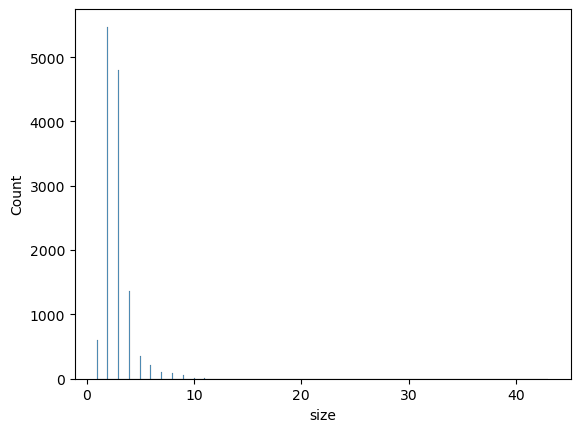

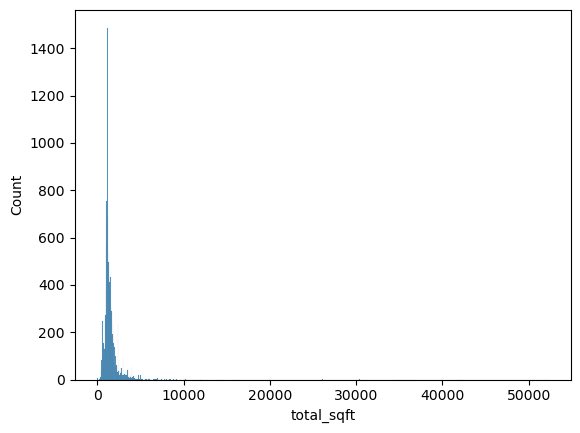

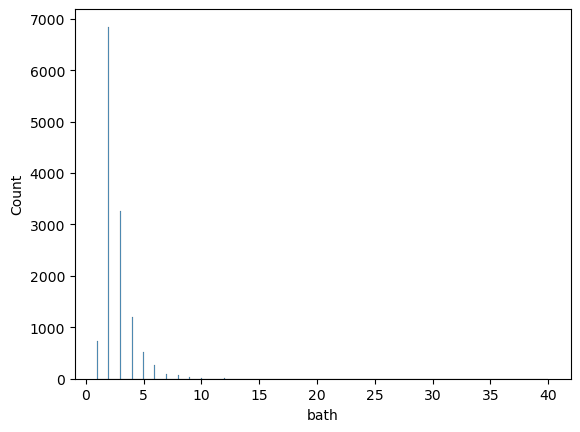

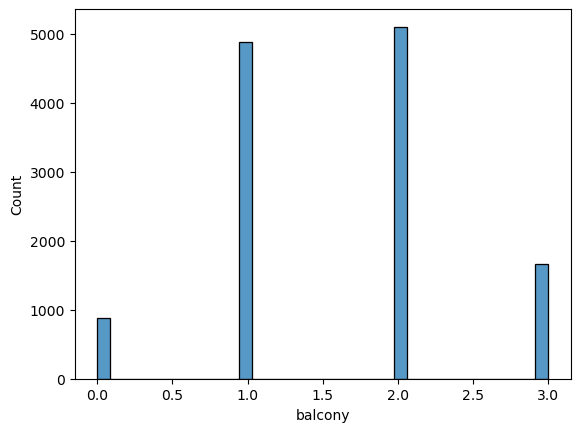

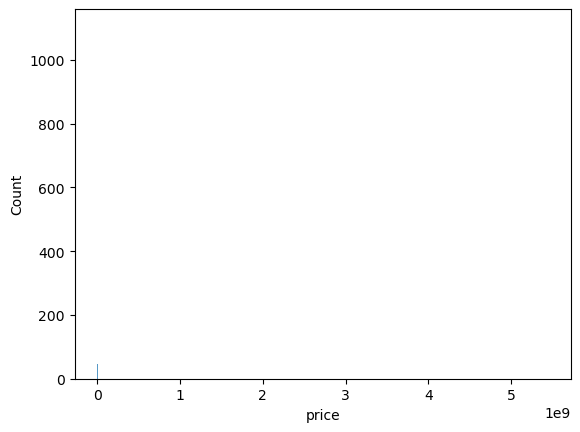

In [178]:
for i in df.select_dtypes(include="float").columns:
    sns.histplot(x=i,data=df)
    plt.show()

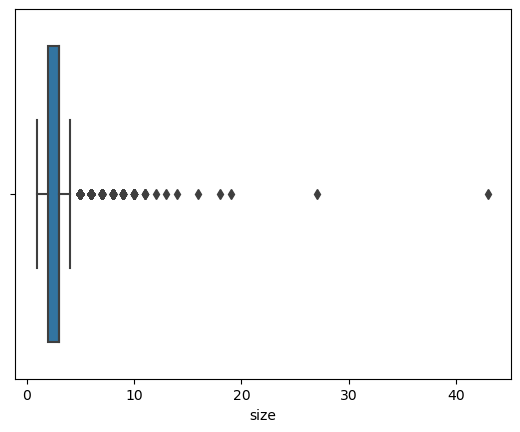

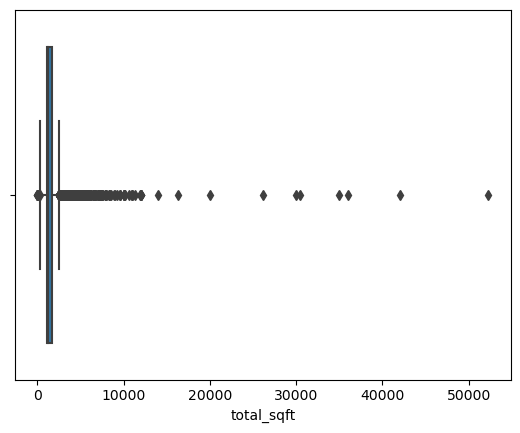

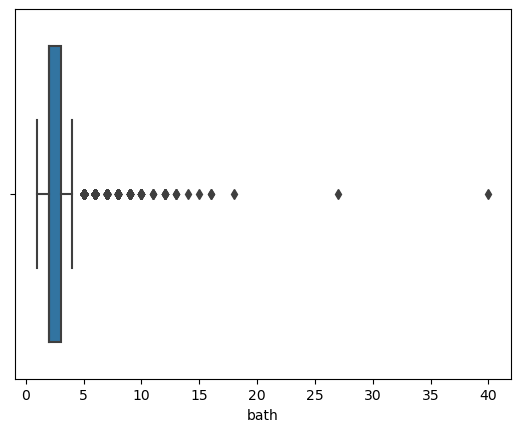

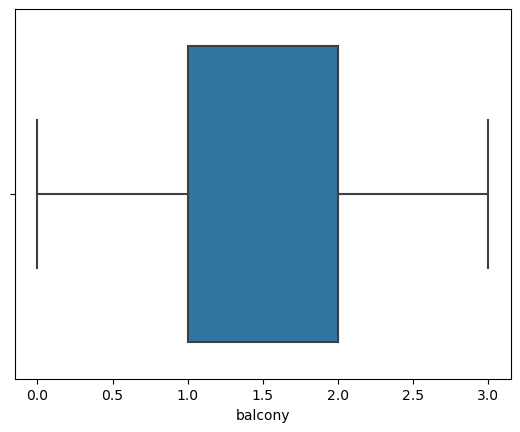

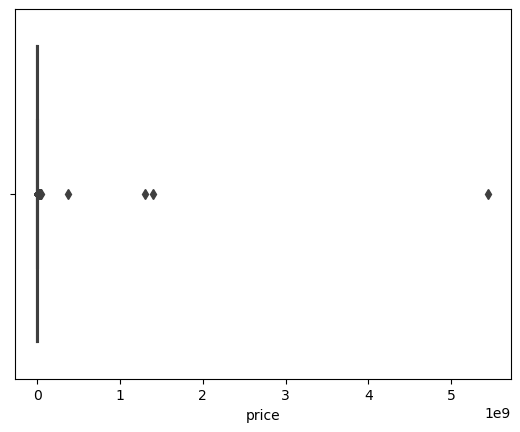

In [147]:
for i in df.select_dtypes(include="float").columns:
    sns.boxplot(x=i,data=df)
    plt.show()

<Axes: >

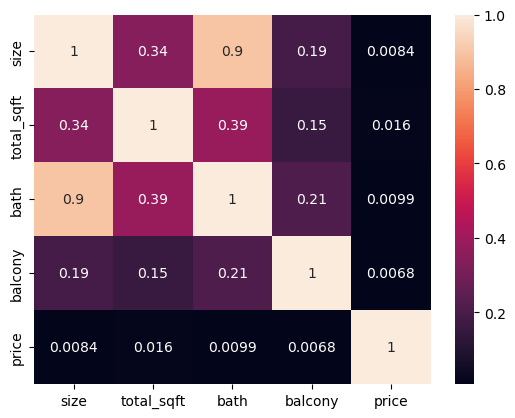

In [179]:
# plt.figure(figsize=(50,50))
s=df.select_dtypes(include="float").corr()
sns.heatmap(s,annot=True)

In [180]:
df

,property_scope,location,size,total_sqft,bath,balcony,BER,Renovation needed,price
0,Extended Coverage,Fingal,2.0,1056.0,2.0,1.0,A,No,4.434440e+05
1,Land Parcel,South Dublin,4.0,2600.0,5.0,3.0,D,Yes,1.362000e+06
2,Constructed Space,Dun Laoghaire,3.0,1440.0,2.0,3.0,G,Yes,7.037000e+05
3,Extended Coverage,South Dublin,3.0,1521.0,3.0,1.0,G,Yes,1.078250e+06
4,Extended Coverage,DCC,2.0,1200.0,2.0,1.0,F,Yes,5.788500e+05
...,...,...,...,...,...,...,...,...,...
13315,Constructed Space,Dun Laoghaire,5.0,3453.0,4.0,0.0,B,Maybe,2.621850e+06
13316,Extended Coverage,Fingal,4.0,3600.0,5.0,NaN,A,No,4.540000e+06
13317,Constructed Space,Fingal,2.0,1141.0,2.0,1.0,A,No,6.810000e+05
13318,Extended Coverage,South Dublin,4.0,4689.0,4.0,1.0,C,Maybe,5.538800e+06


In [181]:
df.select_dtypes(include='number').corr()

,size,total_sqft,bath,balcony,price
size,1.000000,0.341324,0.898137,0.185600,0.008363
total_sqft,0.341324,1.000000,0.385656,0.154523,0.016492
bath,0.898137,0.385656,1.000000,0.210263,0.009950
balcony,0.185600,0.154523,0.210263,1.000000,0.006772
price,0.008363,0.016492,0.009950,0.006772,1.000000


# Outlier Handling using IQR

In [182]:
import numpy as np

columns_list = ['size', 'total_sqft', 'bath', 'price']

def wisker(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

for col in columns_list:
    lw, uw = wisker(df, col)
    df[col] = np.where(df[col] < lw, lw, df[col])
    df[col] = np.where(df[col] > uw, uw, df[col])

df


C:\Users\user\AppData\Local\Temp\ipykernel_7248\203125138.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lw, lw, df[col])
C:\Users\user\AppData\Local\Temp\ipykernel_7248\203125138.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > uw, uw, df[col])
C:\Users\user\AppData\Local\Temp\ipykernel_7248\203125138.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,property_scope,location,size,total_sqft,bath,balcony,BER,Renovation needed,price
0,Extended Coverage,Fingal,2.0,1056.0,2.0,1.0,A,No,4.434440e+05
1,Land Parcel,South Dublin,4.0,2512.5,4.5,3.0,D,Yes,1.362000e+06
2,Constructed Space,Dun Laoghaire,3.0,1440.0,2.0,3.0,G,Yes,7.037000e+05
3,Extended Coverage,South Dublin,3.0,1521.0,3.0,1.0,G,Yes,1.078250e+06
4,Extended Coverage,DCC,2.0,1200.0,2.0,1.0,F,Yes,5.788500e+05
...,...,...,...,...,...,...,...,...,...
13315,Constructed Space,Dun Laoghaire,4.5,2512.5,4.0,0.0,B,Maybe,2.553750e+06
13316,Extended Coverage,Fingal,4.0,2512.5,4.5,NaN,A,No,2.553750e+06
13317,Constructed Space,Fingal,2.0,1141.0,2.0,1.0,A,No,6.810000e+05
13318,Extended Coverage,South Dublin,4.0,2512.5,4.0,1.0,C,Maybe,2.553750e+06


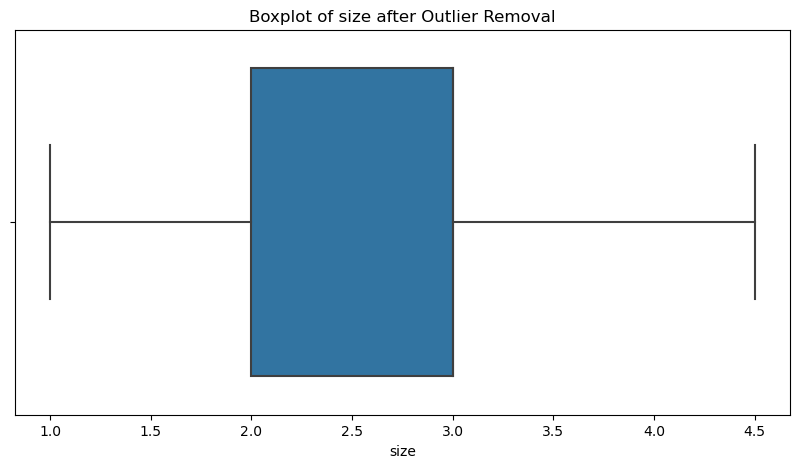

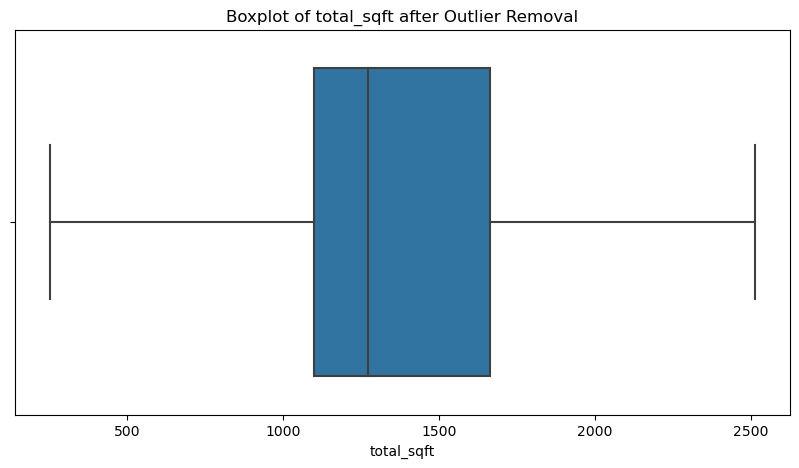

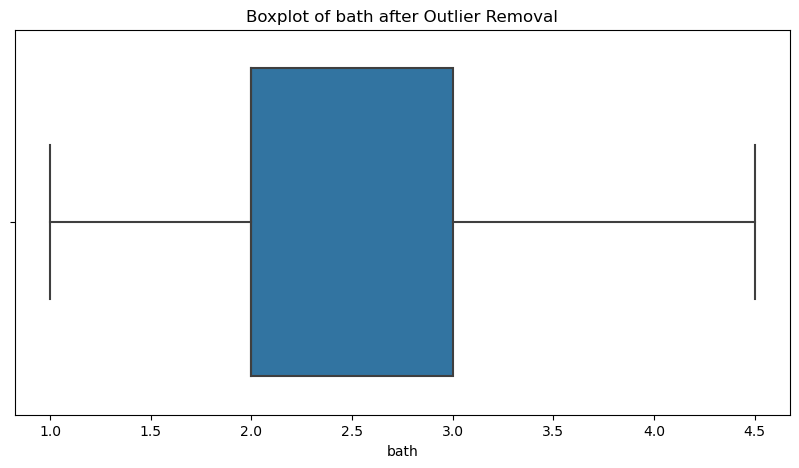

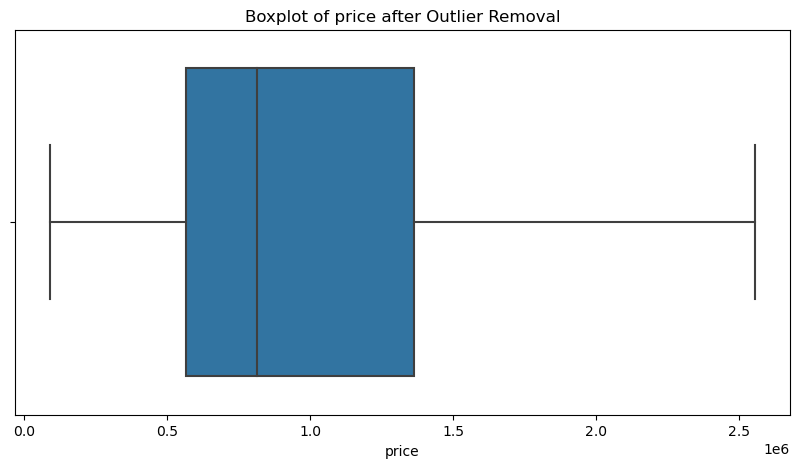

In [183]:
for col in columns_list:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after Outlier Removal')
    plt.show()

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13074 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_scope     13074 non-null  object 
 1   location           13073 non-null  object 
 2   size               13066 non-null  float64
 3   total_sqft         12987 non-null  float64
 4   bath               13057 non-null  float64
 5   balcony            12525 non-null  float64
 6   BER                13074 non-null  object 
 7   Renovation needed  13074 non-null  object 
 8   price              12987 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1021.4+ KB


In [185]:
df = df.dropna(subset=['price'])

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12987 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_scope     12987 non-null  object 
 1   location           12986 non-null  object 
 2   size               12979 non-null  float64
 3   total_sqft         12987 non-null  float64
 4   bath               12970 non-null  float64
 5   balcony            12439 non-null  float64
 6   BER                12987 non-null  object 
 7   Renovation needed  12987 non-null  object 
 8   price              12987 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1014.6+ KB


# Imputing and Encoding

In [187]:
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
X = df.drop(columns=['price','BER'])
z=df['BER']
y = df['price']
num = ['size', 'total_sqft', 'bath','balcony']
cat = ['property_scope', 'location', 'Renovation needed']
num_trf= Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])
cat_trf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first')),
])
preprocessor = ColumnTransformer([
        ('num', num_trf, num),
        ('cat', cat_trf, cat),
    
    ],
    remainder='passthrough' 
)
X_transformed = preprocessor.fit_transform(X)
columns = (
    num +
    list(preprocessor.transformers_[1][1]['encoder'].get_feature_names_out(cat))
)

X_transformed_df = pd.DataFrame(X_transformed, columns=columns)
X_transformed_df.head()



,size,total_sqft,bath,balcony,property_scope_Extended Coverage,property_scope_Land Parcel,property_scope_Usable Interior,location_Dun Laoghaire,location_Fingal,location_Other,location_South Dublin,Renovation needed_No,Renovation needed_Yes
0,-0.791163,-0.710841,-0.622644,-0.771969,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.509414,2.109676,2.114571,1.756418,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.359125,0.032776,-0.622644,1.756418,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.359125,0.189633,0.472242,-0.771969,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.791163,-0.431985,-0.622644,-0.771969,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [188]:
ber = OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']])
z = ber.fit_transform(z.values.reshape(-1, 1))
z = pd.DataFrame(z, columns=['BER'])  
z.head()


,BER
0,0.0
1,3.0
2,6.0
3,6.0
4,5.0


In [189]:
X_transformed_df['BER']=z
X_transformed_df

,size,total_sqft,bath,balcony,property_scope_Extended Coverage,property_scope_Land Parcel,property_scope_Usable Interior,location_Dun Laoghaire,location_Fingal,location_Other,location_South Dublin,Renovation needed_No,Renovation needed_Yes,BER
0,-0.791163,-0.710841,-0.622644,-0.771969,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.509414,2.109676,2.114571,1.756418,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0
2,0.359125,0.032776,-0.622644,1.756418,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0
3,0.359125,0.189633,0.472242,-0.771969,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0
4,-0.791163,-0.431985,-0.622644,-0.771969,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12982,2.084558,2.109676,1.567128,-2.036163,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12983,1.509414,2.109676,2.114571,0.239386,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12984,-0.791163,-0.546238,-0.622644,-0.771969,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
12985,1.509414,2.109676,1.567128,-0.771969,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [156]:
X_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12987 entries, 0 to 12986
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   size                              12987 non-null  float64
 1   total_sqft                        12987 non-null  float64
 2   bath                              12987 non-null  float64
 3   balcony                           12987 non-null  float64
 4   property_scope_Extended Coverage  12987 non-null  float64
 5   property_scope_Land Parcel        12987 non-null  float64
 6   property_scope_Usable Interior    12987 non-null  float64
 7   location_Dun Laoghaire            12987 non-null  float64
 8   location_Fingal                   12987 non-null  float64
 9   location_Other                    12987 non-null  float64
 10  location_South Dublin             12987 non-null  float64
 11  Renovation needed_No              12987 non-null  float64
 12  Reno

In [157]:
y

0        4.434440e+05
1        1.362000e+06
2        7.037000e+05
3        1.078250e+06
4        5.788500e+05
             ...     
13315    2.553750e+06
13316    2.553750e+06
13317    6.810000e+05
13318    2.553750e+06
13319    1.929500e+05
Name: price, Length: 12987, dtype: float64

# Predictive Analysis

In [190]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform, randint

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Applying PCA 
pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(learning_rate=0.1, n_estimators=100),
    'XGBoost Regressor': xgb.XGBRegressor(learning_rate=0.1, n_estimators=100, use_label_encoder=False, eval_metric='rmse')
}

# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.7, 0.3),
}

gb = GradientBoostingRegressor(random_state=42)
rand_search_gb = RandomizedSearchCV(gb, param_distributions=param_grid_gb, n_iter=50, cv=5, scoring='r2', random_state=42, n_jobs=-1)
rand_search_gb.fit(X_train, y_train)
best_gb = rand_search_gb.best_estimator_

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'colsample_bytree': uniform(0.7, 0.3),
    'subsample': uniform(0.7, 0.3),
}

xgb_model = xgb.XGBRegressor(random_state=42, eval_metric='rmse', use_label_encoder=False)
rand_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_grid_xgb, n_iter=50, cv=5, scoring='r2', random_state=42, n_jobs=-1)
rand_search_xgb.fit(X_train, y_train)
best_xgb = rand_search_xgb.best_estimator_

# Ensemble: Stacking Regressor
stacking = StackingRegressor(estimators=[
    ('rf', RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)),
    ('gb', best_gb),
    ('xgb', best_xgb)
], final_estimator=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))

stacking.fit(X_train, y_train)

# Evaluate all models and print results
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    if r2 >= 0:  # Filter out models with negative R²
        print(f"--- {name} ---")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R²: {r2:.4f} ({r2 * 100:.2f}%)\n")

        # Cross validation
        cv_r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        print(f"Cross-Validation Mean R²: {cv_r2_scores.mean():.4f} ({cv_r2_scores.mean() * 100:.2f}%)\n")

# Evaluate Stacking Regressor
y_pred_stacking = stacking.predict(X_test)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f"--- Stacking Regressor ---")
print(f"MSE: {mse_stacking:.4f}")
print(f"RMSE: {rmse_stacking:.4f}")
print(f"MAE: {mae_stacking:.4f}")
print(f"R²: {r2_stacking:.4f} ({r2_stacking * 100:.2f}%)\n")

cv_stacking_r2_scores = cross_val_score(stacking, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation Mean R² for Stacking Regressor: {cv_stacking_r2_scores.mean():.4f} ({cv_stacking_r2_scores.mean() * 100:.2f}%)\n")

C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:35:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:35:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:36:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\xgbo

--- Linear Regression ---
MSE: 134618629998.2126
RMSE: 366904.1155
MAE: 263064.2797
R²: 0.7084 (70.84%)

Cross-Validation Mean R²: 0.6908 (69.08%)

--- Ridge Regression ---
MSE: 134621223458.3356
RMSE: 366907.6498
MAE: 263078.5667
R²: 0.7084 (70.84%)

Cross-Validation Mean R²: 0.6908 (69.08%)

--- Lasso Regression ---
MSE: 134618682381.0113
RMSE: 366904.1869
MAE: 263064.3627
R²: 0.7084 (70.84%)

Cross-Validation Mean R²: 0.6908 (69.08%)

--- Decision Tree Regressor ---
MSE: 198996559324.4419
RMSE: 446090.3040
MAE: 282516.1115
R²: 0.5690 (56.90%)

Cross-Validation Mean R²: 0.5392 (53.92%)

--- Random Forest Regressor ---
MSE: 126312813554.9870
RMSE: 355405.1400
MAE: 235215.1142
R²: 0.7264 (72.64%)

Cross-Validation Mean R²: 0.7112 (71.12%)

--- Gradient Boosting Regressor ---
MSE: 113268203667.3172
RMSE: 336553.4187
MAE: 235306.4155
R²: 0.7547 (75.47%)

Cross-Validation Mean R²: 0.7388 (73.88%)

--- XGBoost Regressor ---
MSE: 110121046083.0088
RMSE: 331844.9127
MAE: 226659.5796
R²: 0.76

C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:36:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:36:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:36:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\xgbo

Cross-Validation Mean R²: 0.7388 (73.88%)

--- Stacking Regressor ---
MSE: 111182625200.5804
RMSE: 333440.5872
MAE: 228845.2476
R²: 0.7592 (75.92%)



C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:36:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:37:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:37:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\xgbo

Cross-Validation Mean R² for Stacking Regressor: 0.7431 (74.31%)



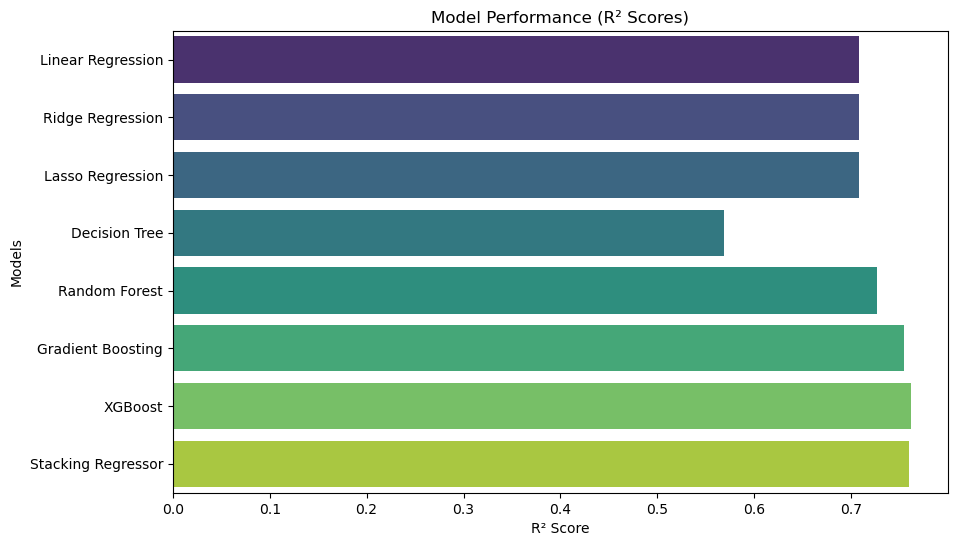

In [192]:
models = [
    "Linear Regression", "Ridge Regression", "Lasso Regression", 
    "Decision Tree", "Random Forest", "Gradient Boosting", 
    "XGBoost", "Stacking Regressor"
]
r2_scores = [0.7084, 0.7084, 0.7084, 0.5690, 0.7264, 0.7547, 0.7615, 0.7592]

plt.figure(figsize=(10, 6))
sns.barplot(x=r2_scores, y=models, palette="viridis")
plt.xlabel("R² Score")
plt.ylabel("Models")
plt.title("Model Performance (R² Scores)")
plt.show()


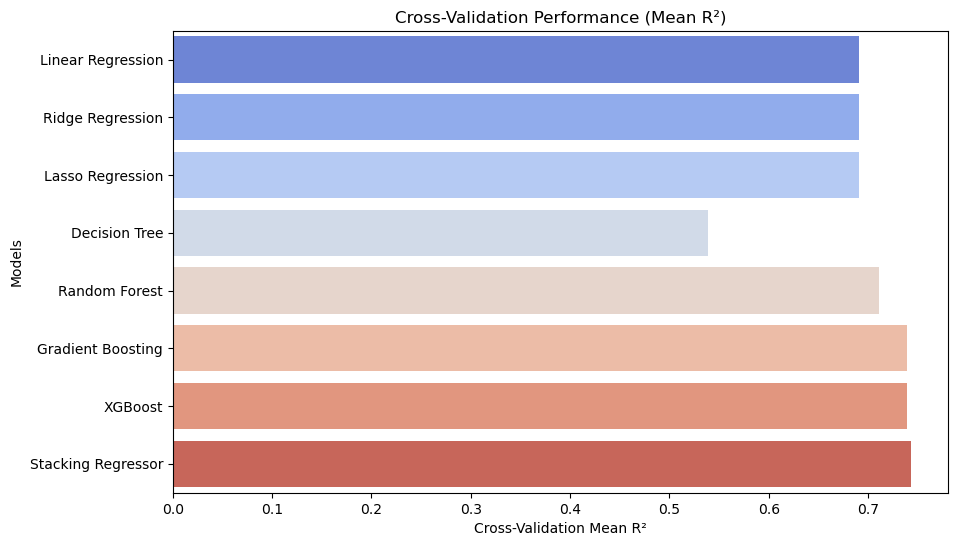

In [193]:
cv_r2 = [0.6908, 0.6908, 0.6908, 0.5392, 0.7112, 0.7388, 0.7388, 0.7431]

plt.figure(figsize=(10, 6))
sns.barplot(x=cv_r2, y=models, palette="coolwarm")
plt.xlabel("Cross-Validation Mean R²")
plt.ylabel("Models")
plt.title("Cross-Validation Performance (Mean R²)")
plt.show()
